               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


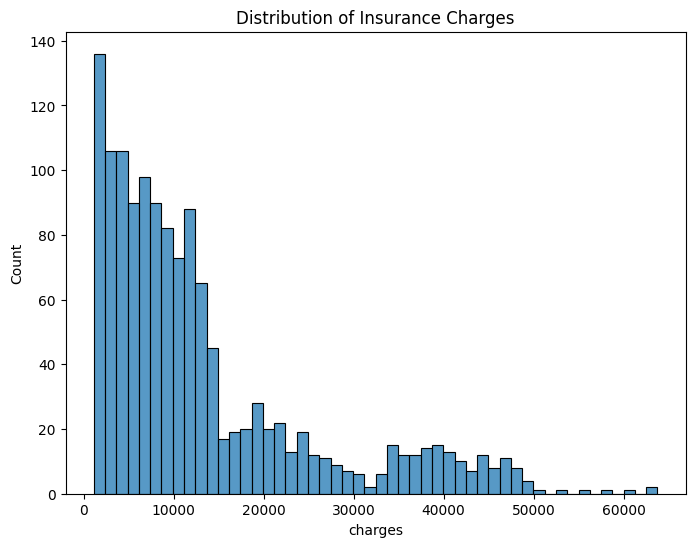

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'data\\insurance.csv'
insurance_data = pd.read_csv(file_path)

# Thống kê mô tả
print(insurance_data.describe())

# Kiểm tra các giá trị null
print(insurance_data.isnull().sum())

# Mô tả biểu đồ phân phối chi phí bảo hiểm
plt.figure(figsize=(8,6))
sns.histplot(insurance_data['charges'], bins=50)
plt.title('Distribution of Insurance Charges')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Chọn các cột dữ liệu dạng số và dạng phân loại
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

# Tạo ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']
insurance_data.to_csv('data\\prepocessed_data.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lưu scaler và encoder
joblib.dump(preprocessor, 'models\\preprocessor.pkl')

# Lưu X_test và y_test dưới dạng CSV vào thư mục data
X_test.to_csv('data/X_test.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)


In [13]:
import joblib
import os
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

# Tạo thư mục để lưu mô hình (nếu chưa tồn tại)
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

# Tạo các mô hình
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'Ridge Regression': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())]),
    'Neural Network (MLPRegressor)': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', MLPRegressor(max_iter=500, learning_rate_init=0.01))])
}



# Huấn luyện, đánh giá và lưu các mô hình
results = {}
for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test)

    # Tính toán các chỉ số hiệu năng
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'R^2': r2}

    # Lưu mô hình đã huấn luyện vào thư mục models
    model_filename = os.path.join(models_dir, f'{name.replace(" ", "_").lower()}.pkl')
    joblib.dump(model, model_filename)

# Hiển thị kết quả
print("Model Performance Results:")
for name, result in results.items():
    print(f"{name} - MAE: {result['MAE']:.2f}, R^2: {result['R^2']:.2f}")

print(f"\nModels have been saved to the '{models_dir}' directory.")


Model Performance Results:
Linear Regression - MAE: 4181.19, R^2: 0.78
Ridge Regression - MAE: 4186.91, R^2: 0.78
Neural Network (MLPRegressor) - MAE: 2632.19, R^2: 0.88

Models have been saved to the 'models' directory.


c:\Users\tanhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


                           Model          MAE       R^2
0              Linear Regression  4181.194474  0.783593
1               Ridge Regression  4186.913072  0.783443
2  Neural Network (MLPRegressor)  2632.194274  0.876745


C:\Users\tanhu\AppData\Local\Temp\ipykernel_5108\1689367904.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df, hue=None, palette='viridis', legend=False)


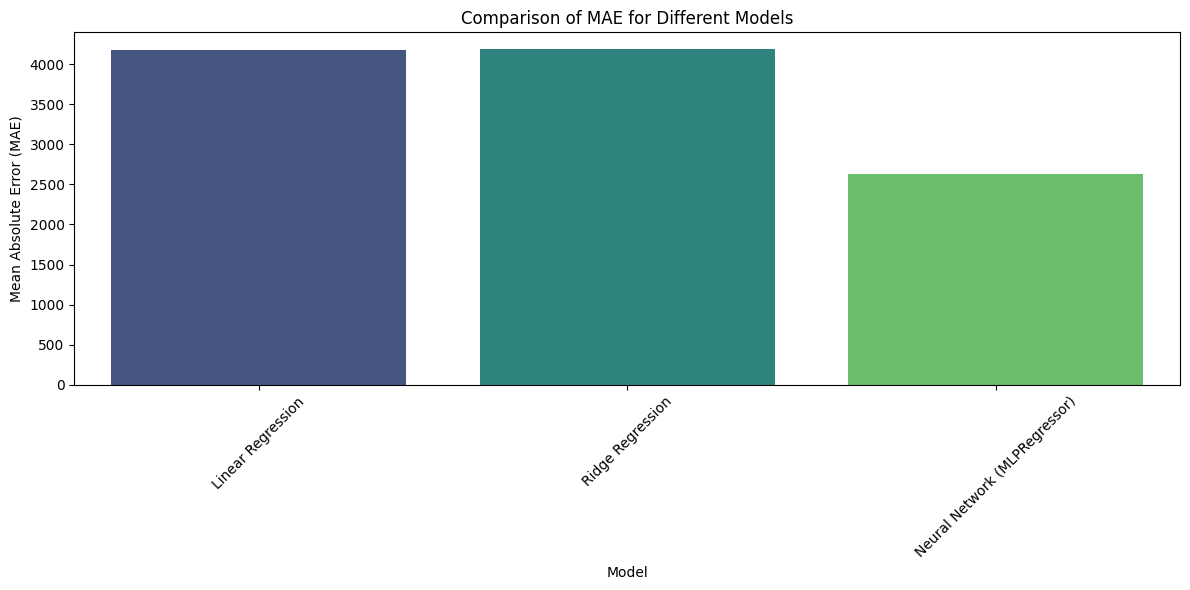

C:\Users\tanhu\AppData\Local\Temp\ipykernel_5108\1689367904.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R^2', data=results_df, hue=None, palette='viridis', legend=False)


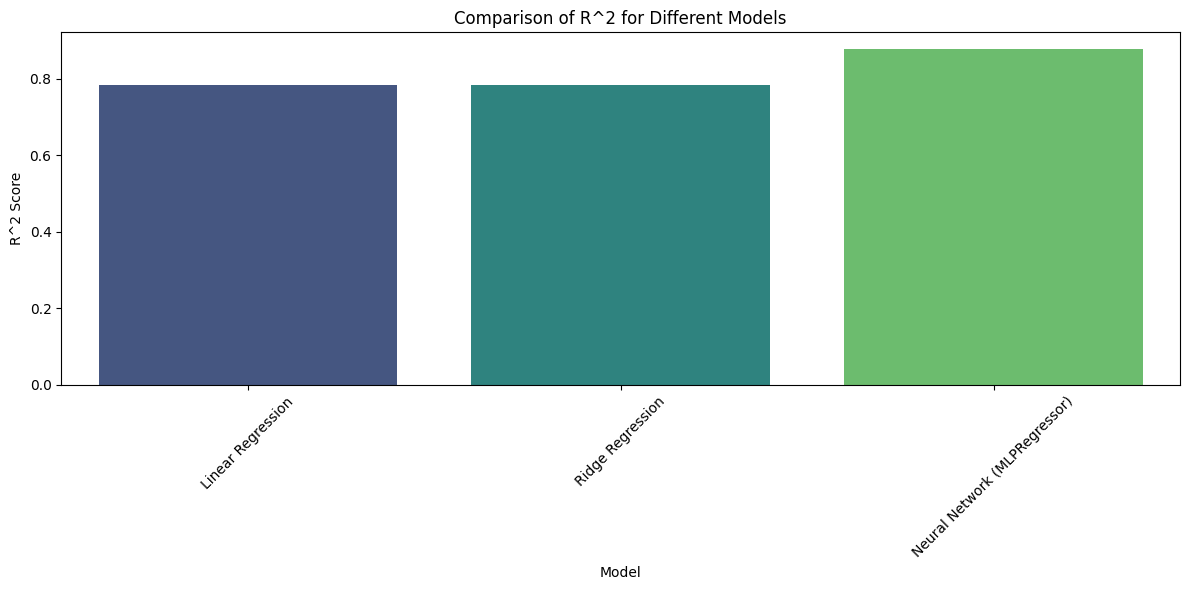

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển đổi kết quả thành DataFrame
results_df = pd.DataFrame(results).T  # Chuyển đổi từ dictionary sang DataFrame và đảo ngược chỉ số
results_df.reset_index(inplace=True)
results_df.columns = ['Model', 'MAE', 'R^2']  # Đặt tên cho các cột

# In kết quả đẹp4
print(results_df)

# Vẽ biểu đồ so sánh MAE và R²
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='MAE', data=results_df, hue=None, palette='viridis', legend=False)
plt.title('Comparison of MAE for Different Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R^2', data=results_df, hue=None, palette='viridis', legend=False)
plt.title('Comparison of R^2 for Different Models')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
# Lưu mô hình tốt nhất
best_model = models['Neural Network (MLPRegressor)']  
joblib.dump(best_model, 'models\\best_model.pkl')

['models\\best_model.pkl']

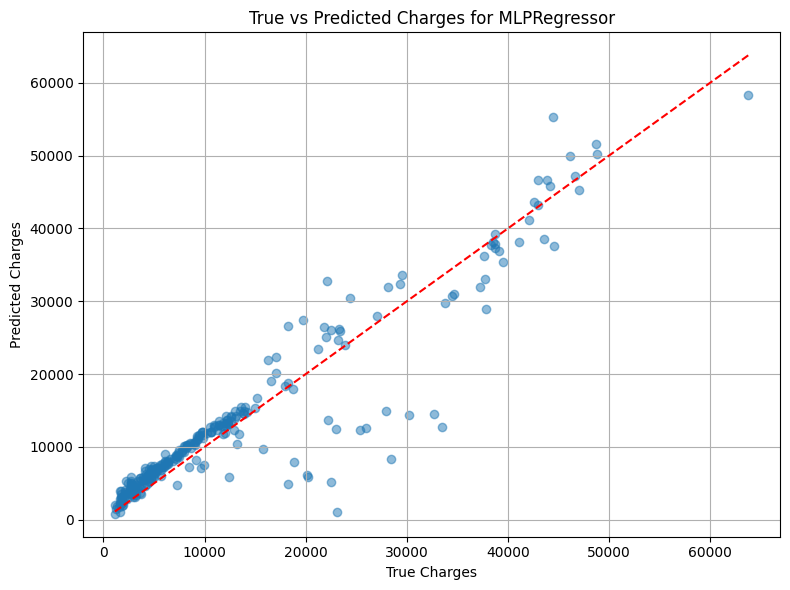

In [16]:
# Đầu vào và đầu ra từ mô hình MLPRegressor
X_test_processed = preprocessor.transform(X_test)
y_pred_mlp = best_model.predict(X_test)

# Vẽ biểu đồ phân tán giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Đường chuẩn
plt.xlabel("True Charges")
plt.ylabel("Predicted Charges")
plt.title("True vs Predicted Charges for MLPRegressor")
plt.grid()
plt.tight_layout()
plt.show()


MLP MAE: 2632.1942741272887, MSE: 19135254.197679084, R^2: 0.8767445375314191


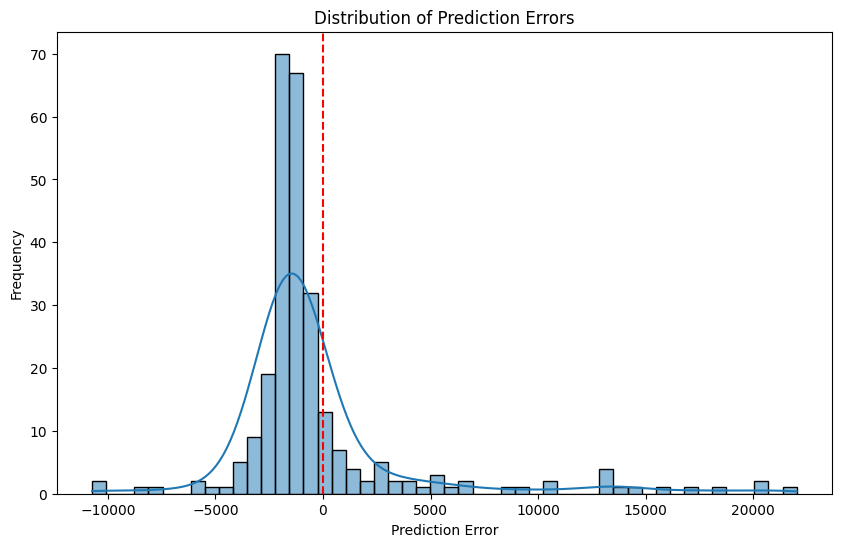

In [17]:
# Phân tích lỗi
errors = y_test - y_pred_mlp

# Tính toán các chỉ số lỗi
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP MAE: {mae_mlp}, MSE: {mse_mlp}, R^2: {r2_mlp}")

# Vẽ biểu đồ phân phối lỗi
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=50, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Đường chuẩn
plt.show()


In [18]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor

# Định nghĩa các mô hình cơ sở cho Stacking
base_models = [
    ('linear_regression', Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])),
    ('ridge', Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge())])),
    ('mlp', Pipeline(steps=[('preprocessor', preprocessor), ('regressor', MLPRegressor(max_iter=1000))]))
]

# Định nghĩa mô hình Stacking với DecisionTreeRegressor làm mô hình cuối cùng
stacking_model = StackingRegressor(estimators=base_models, final_estimator=DecisionTreeRegressor())

# Huấn luyện mô hình Stacking
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

# Tính toán các chỉ số cho mô hình Stacking
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

print(f"Stacking MAE: {mae_stacking}, MSE: {mse_stacking}, R^2: {r2_stacking}")


c:\Users\tanhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tanhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tanhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\tanhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

Stacking MAE: 4780.557030555971, MSE: 61543752.606269695, R^2: 0.6035796749197216


c:\Users\tanhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
joblib.dump(stacking_model,'models//stacking_model.joblib')

['models//stacking_model.joblib']